In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Augmented code generation only for the files that contains less no.of images**

**Plotting Graph to check no.of images in each class**

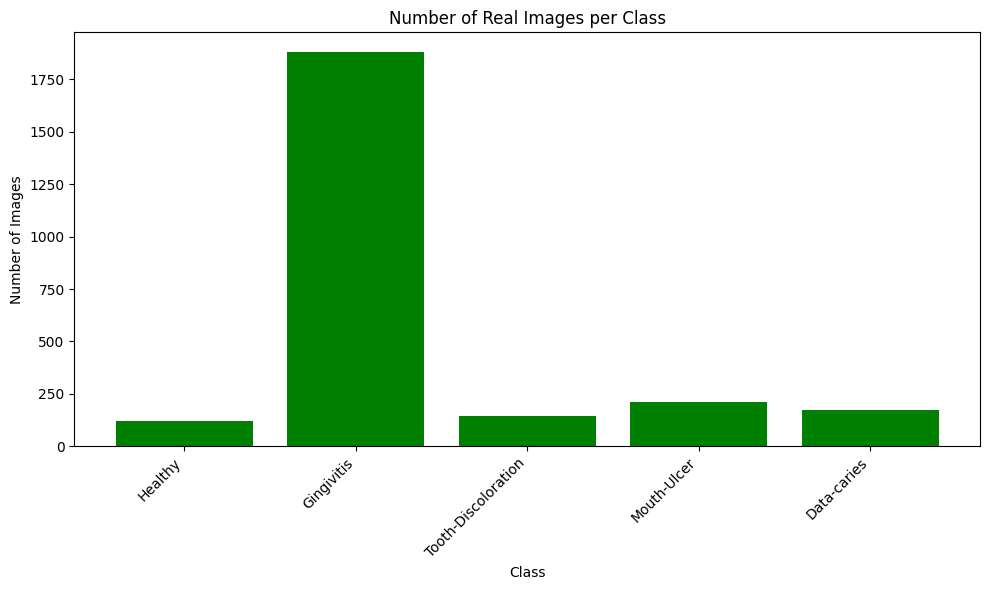

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_per_class(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name,'real')
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

def plot_image_counts(class_counts):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='green')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Number of Real Images per Class')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage:
data_dir = '/content/drive/MyDrive/train'
class_counts = count_images_per_class(data_dir)
plot_image_counts(class_counts)

**Displaying the real sample images**

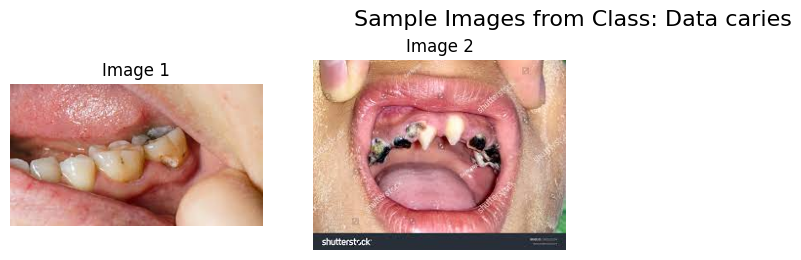

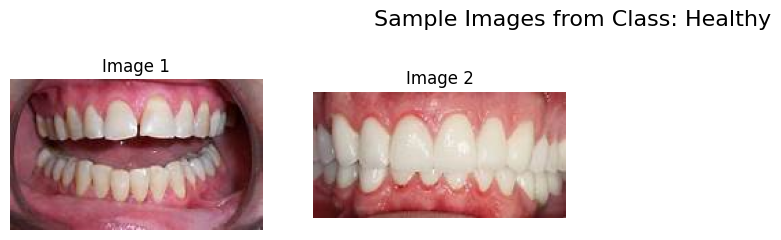

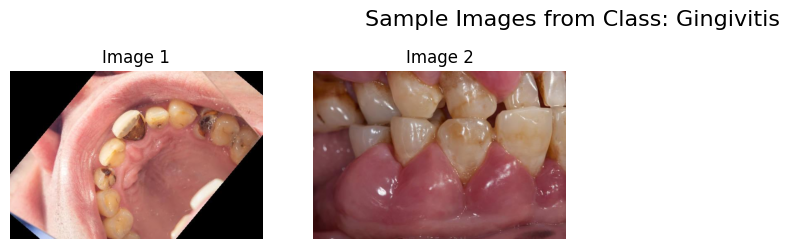

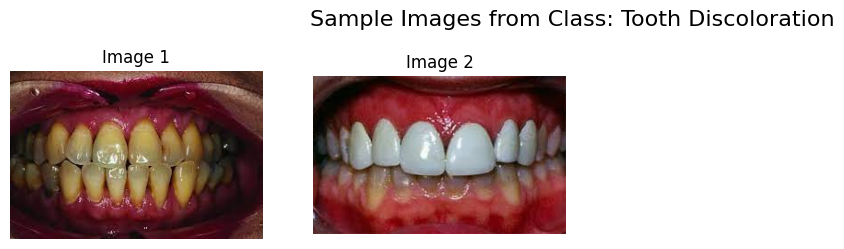

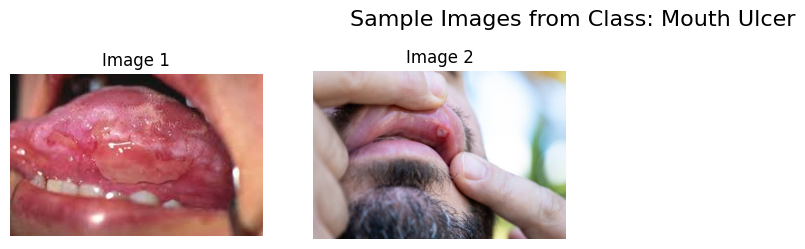

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_from_class(path, class_name):
    class_path = os.path.join(path, class_name)
    images = os.listdir(class_path)

    plt.figure(figsize=(15, 3))
    for i, image_name in enumerate(images):
        if i >= 2:
            break  # Display only the first 2 images
        img_path = os.path.join(class_path, image_name)
        img = mpimg.imread(img_path)

        plt.subplot(1, 4, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.suptitle(f"Sample Images from Class: {class_name}", fontsize=16)
    plt.show()

display_images_from_class('/content/drive/MyDrive/test', 'Data caries')
display_images_from_class('/content/drive/MyDrive/test', 'Healthy')
display_images_from_class('/content/drive/MyDrive/validation', 'Gingivitis')
display_images_from_class('/content/drive/MyDrive/test', 'Tooth Discoloration')
display_images_from_class('/content/drive/MyDrive/validation', 'Mouth Ulcer')

**Generating augmented images inorder to balance the dataset**

**Data caries**

In [ ]:
#Augmented data-Data Caries

import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Directory containing your original images
train_data_dir = '/content/drive/MyDrive/train/Data caries'
target_count = 2000

# Directory to save augmented images
augmented_data_dir = '/content/drive/MyDrive/augmented_train/Data caries'
if not os.path.exists(augmented_data_dir):
    os.makedirs(augmented_data_dir)

# Initialize the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Degree range for random rotations
    width_shift_range=0.2,  # Range for random horizontal shifts
    height_shift_range=0.2, # Range for random vertical shifts
    shear_range=0.2,        # Shear Intensity
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    vertical_flip=True,     # Randomly flip inputs vertically
    fill_mode='nearest'     # Points outside the boundaries are filled according to the given mode
)
# Count the number of images in the folder
num_images =sum([len(files) for _, _, files in os.walk(path)])
    # Calculate the number of augmentation steps needed to reach the target count
augment_steps = (target_count - num_images) // num_images
# Loop through each image in the training directory
folder_path = train_data_dir  # Path to the folder containing images
save_dir = augmented_data_dir  # Path to the folder to save augmented images
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    if os.path.isfile(img_path):
        img = load_img(img_path)  # Load the original image
        x = img_to_array(img)     # Convert image to numpy array
        x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels) for augmentation

        # Generate augmented image
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='augmented_', save_format='jpg'):
            i += 1
            if i >= 9:  # Generate 5 augmented images per original image
                break  # Exit the loop to prevent infinite generation

**Displaying the augmented images that are generated for class Data caries**

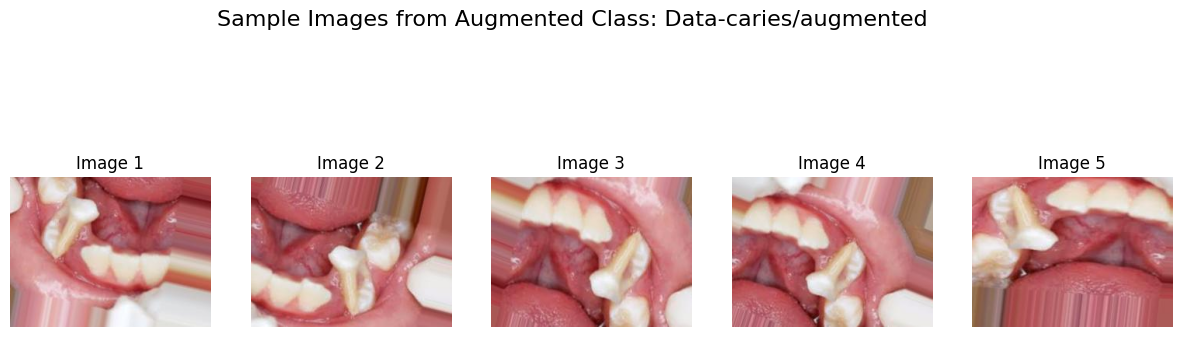

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_from_class(path, class_name):
    class_path = os.path.join(path, class_name)
    images = os.listdir(class_path)

    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(images):
        if i >= 5:
            break  # Display only the first 5 images
        img_path = os.path.join(class_path, image_name)
        img = mpimg.imread(img_path)

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.suptitle(f"Sample Images from Augmented Class: {class_name}", fontsize=16)
    plt.show()

display_images_from_class('/content/drive/MyDrive/train', 'Data-caries/augmented')

**Healthy**

In [ ]:
#Augmented data-Healthy

import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Directory containing your original images
train_data_dir = '/content/drive/MyDrive/train/Healthy'
target_count = 2000

# Directory to save augmented images
augmented_data_dir = '/content/drive/MyDrive/augmented_train/Healthy'
if not os.path.exists(augmented_data_dir):
    os.makedirs(augmented_data_dir)

# Initialize the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Degree range for random rotations
    width_shift_range=0.2,  # Range for random horizontal shifts
    height_shift_range=0.2, # Range for random vertical shifts
    shear_range=0.2,        # Shear Intensity
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    vertical_flip=True,     # Randomly flip inputs vertically
    fill_mode='nearest'     # Points outside the boundaries are filled according to the given mode
)
# Count the number of images in the folder

# Loop through each image in the training directory
folder_path = train_data_dir  # Path to the folder containing images
save_dir = augmented_data_dir  # Path to the folder to save augmented images
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    if os.path.isfile(img_path):
        img = load_img(img_path)  # Load the original image
        x = img_to_array(img)     # Convert image to numpy array
        x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels) for augmentation

        # Generate augmented image
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='augmented_', save_format='jpg'):
            i += 1
            if i >= 15:  # Generate 5 augmented images per original image
                break  # Exit the loop to prevent infinite generation

****

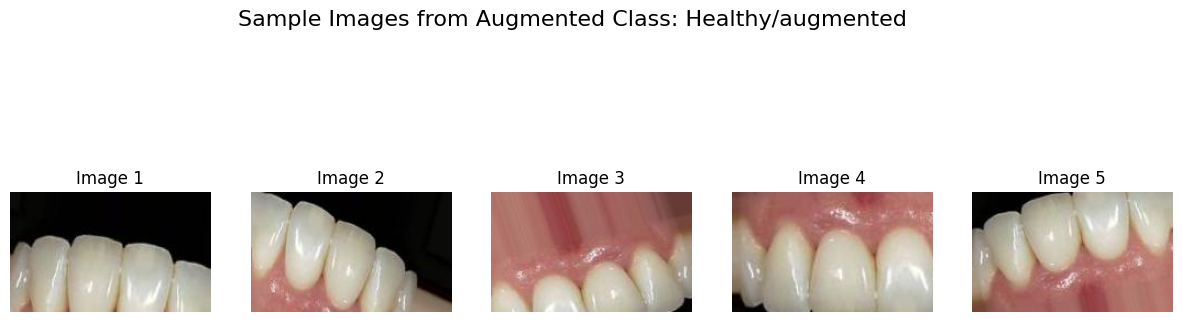

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_from_class(path, class_name):
    class_path = os.path.join(path, class_name)
    images = os.listdir(class_path)

    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(images):
        if i >= 5:
            break  # Display only the first 5 images
        img_path = os.path.join(class_path, image_name)
        img = mpimg.imread(img_path)

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.suptitle(f"Sample Images from Augmented Class: {class_name}", fontsize=16)
    plt.show()

display_images_from_class('/content/drive/MyDrive/train', 'Healthy/augmented')

**Mouth Ulcer**

In [ ]:
#Augmented data-Mouth Ulcer

import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Directory containing your original images
train_data_dir = '/content/drive/MyDrive/train/Mouth Ulcer'
target_count = 2000

# Directory to save augmented images
augmented_data_dir = '/content/drive/MyDrive/augmented_train/Mouth Ulcer'
if not os.path.exists(augmented_data_dir):
    os.makedirs(augmented_data_dir)

# Initialize the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Degree range for random rotations
    width_shift_range=0.2,  # Range for random horizontal shifts
    height_shift_range=0.2, # Range for random vertical shifts
    shear_range=0.2,        # Shear Intensity
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    vertical_flip=True,     # Randomly flip inputs vertically
    fill_mode='nearest'     # Points outside the boundaries are filled according to the given mode
)
# Count the number of images in the folder

# Loop through each image in the training directory
folder_path = train_data_dir  # Path to the folder containing images
save_dir = augmented_data_dir  # Path to the folder to save augmented images
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    if os.path.isfile(img_path):
        img = load_img(img_path)  # Load the original image
        x = img_to_array(img)     # Convert image to numpy array
        x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels) for augmentation

        # Generate augmented image
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='augmented_', save_format='jpg'):
            i += 1
            if i >= 9:  # Generate 5 augmented images per original image
                break  # Exit the loop to prevent infinite generation

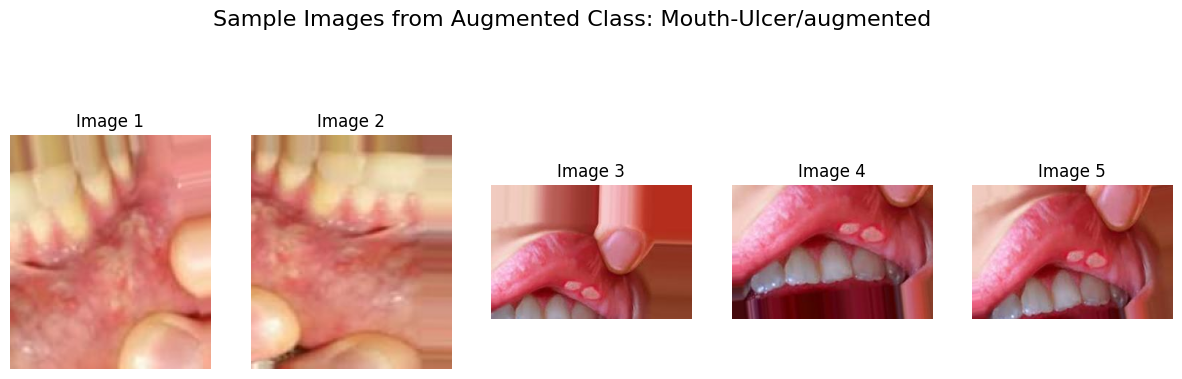

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_from_class(path, class_name):
    class_path = os.path.join(path, class_name)
    images = os.listdir(class_path)

    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(images):
        if i >= 5:
            break  # Display only the first 5 images
        img_path = os.path.join(class_path, image_name)
        img = mpimg.imread(img_path)

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.suptitle(f"Sample Images from Augmented Class: {class_name}", fontsize=16)
    plt.show()

display_images_from_class('/content/drive/MyDrive/train', 'Mouth-Ulcer/augmented')

**Tooth discoloration**

In [ ]:
#Augmented data-Tooth Discoloration

import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Directory containing your original images
train_data_dir = '/content/drive/MyDrive/train/Tooth Discoloration'
target_count = 2000

# Directory to save augmented images
augmented_data_dir = '/content/drive/MyDrive/augmented_train/Tooth Discoloration'
if not os.path.exists(augmented_data_dir):
    os.makedirs(augmented_data_dir)

# Initialize the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Degree range for random rotations
    width_shift_range=0.2,  # Range for random horizontal shifts
    height_shift_range=0.2, # Range for random vertical shifts
    shear_range=0.2,        # Shear Intensity
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    vertical_flip=True,     # Randomly flip inputs vertically
    fill_mode='nearest'     # Points outside the boundaries are filled according to the given mode
)
# Count the number of images in the folder

# Loop through each image in the training directory
folder_path = train_data_dir  # Path to the folder containing images
save_dir = augmented_data_dir  # Path to the folder to save augmented images
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    if os.path.isfile(img_path):
        img = load_img(img_path)  # Load the original image
        x = img_to_array(img)     # Convert image to numpy array
        x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels) for augmentation

        # Generate augmented image
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='augmented_', save_format='jpg'):
            i += 1
            if i >= 12:  # Generate 5 augmented images per original image
                break  # Exit the loop to prevent infinite generation

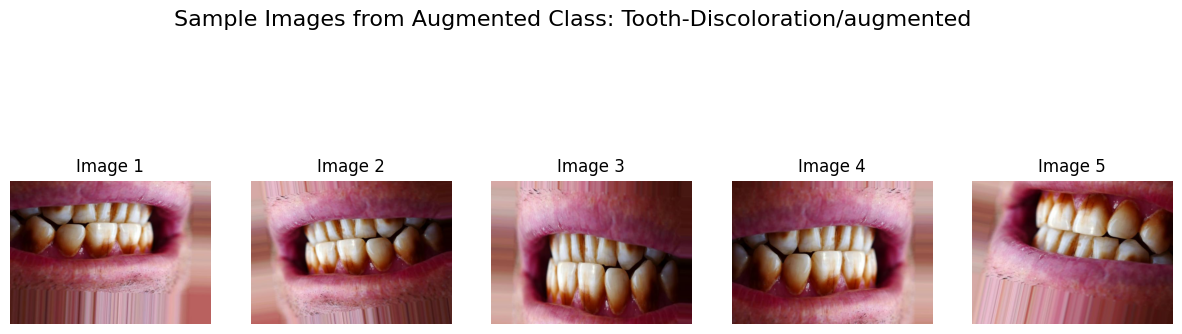

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_from_class(path, class_name):
    class_path = os.path.join(path, class_name)
    images = os.listdir(class_path)

    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(images):
        if i >= 5:
            break  # Display only the first 5 images
        img_path = os.path.join(class_path, image_name)
        img = mpimg.imread(img_path)

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.suptitle(f"Sample Images from Augmented Class: {class_name}", fontsize=16)
    plt.show()

display_images_from_class('/content/drive/MyDrive/train', 'Tooth-Discoloration/augmented')

**Plotting the graph to check no.of images generated**

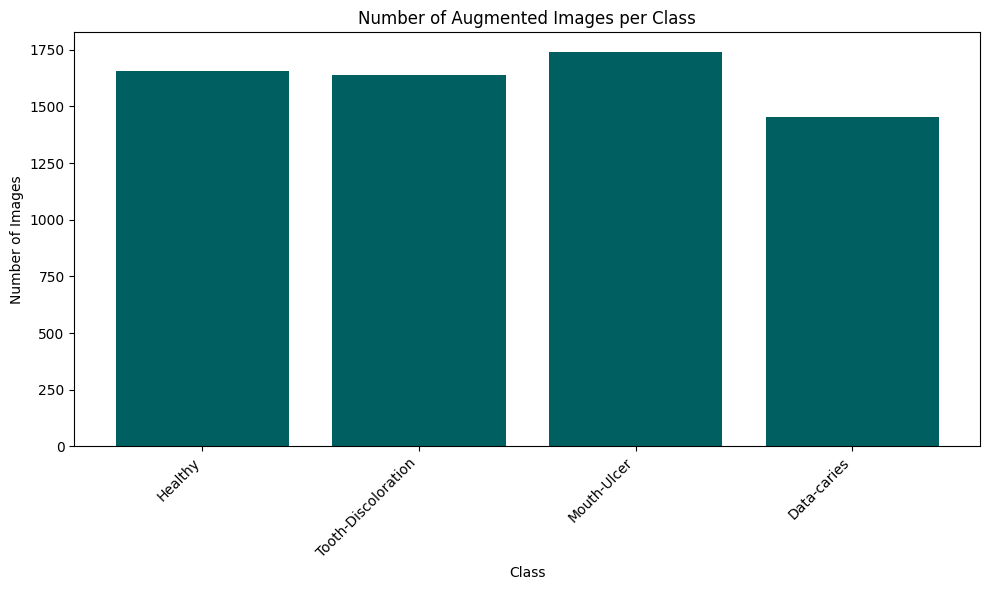

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_per_class(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name,'augmented')
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

def plot_image_counts(class_counts):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='#005F60')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Number of Augmented Images per Class')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

data_dir = '/content/drive/MyDrive/train'
class_counts = count_images_per_class(data_dir)
plot_image_counts(class_counts)

**Plotting the graph to check whether the dataset is balanced or not**

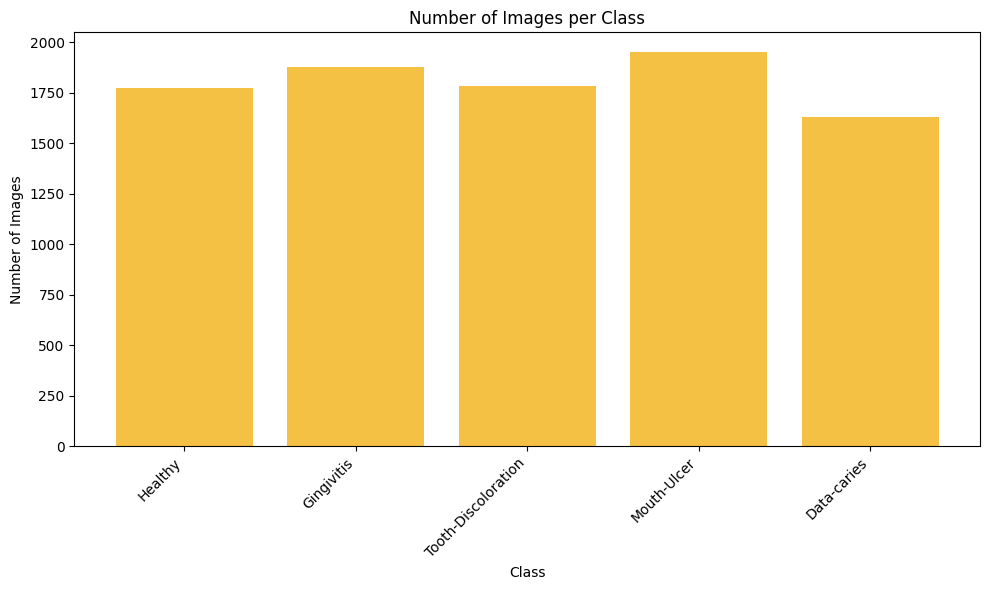

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_per_class(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            total_images = 0
            for subfolder_name in os.listdir(class_path):
                subfolder_path = os.path.join(class_path, subfolder_name)
                if os.path.isdir(subfolder_path):
                    total_images += len(os.listdir(subfolder_path))
            class_counts[class_name] = total_images
    return class_counts

def plot_image_counts(class_counts):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='#F4C145')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Class')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

data_dir = '/content/drive/MyDrive/train'
class_counts = count_images_per_class(data_dir)
plot_image_counts(class_counts)

In [ ]:
import os
def count_images_per_class(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name,'augmented')
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts
data_dir = '/content/drive/MyDrive/train'
class_counts = count_images_per_class(data_dir)
print(class_counts)

{'Healthy': 1655, 'Tooth-Discoloration': 1637, 'Mouth-Ulcer': 1740, 'Data-caries': 1455}


**Displaying the augmented images from each class**

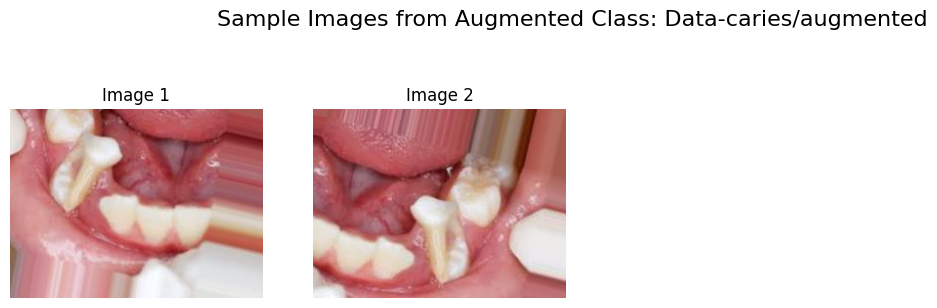

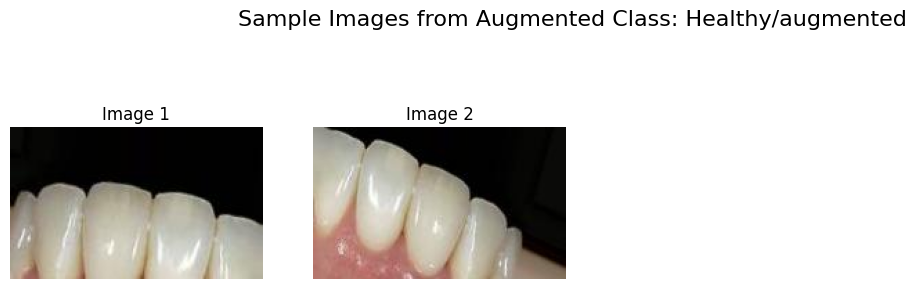

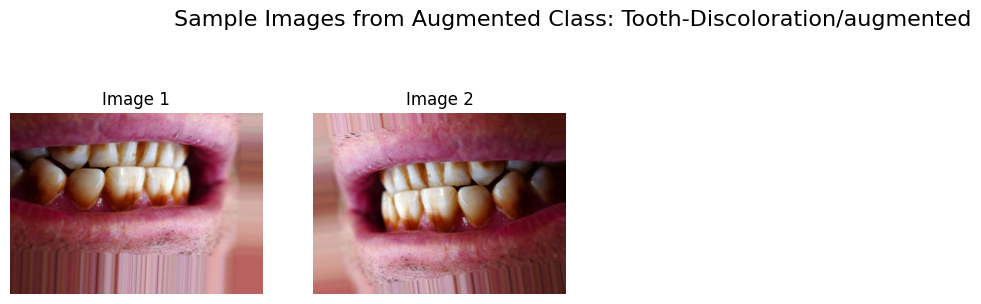

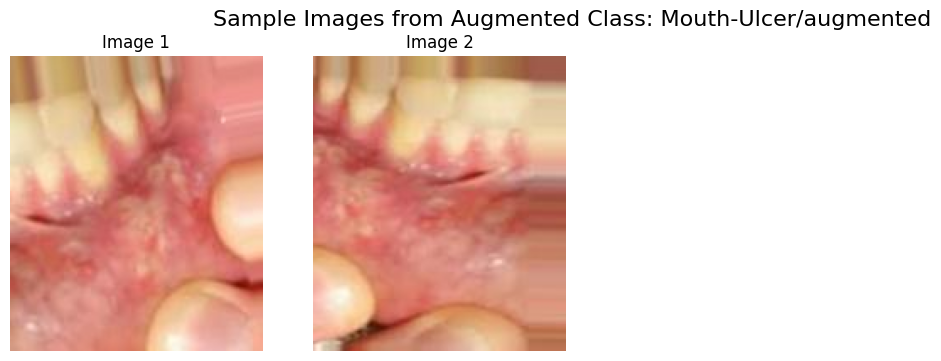

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_from_class(path, class_name):
    class_path = os.path.join(path, class_name)
    images = os.listdir(class_path)

    plt.figure(figsize=(15, 4))
    for i, image_name in enumerate(images):
        if i >= 2:
            break  # Display only the first 5 images
        img_path = os.path.join(class_path, image_name)
        img = mpimg.imread(img_path)

        plt.subplot(1, 4, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.suptitle(f"Sample Images from Augmented Class: {class_name}", fontsize=16)
    plt.show()

display_images_from_class('/content/drive/MyDrive/train', 'Data-caries/augmented')
display_images_from_class('/content/drive/MyDrive/train', 'Healthy/augmented')
display_images_from_class('/content/drive/MyDrive/train', 'Tooth-Discoloration/augmented')
display_images_from_class('/content/drive/MyDrive/train', 'Mouth-Ulcer/augmented')

In [ ]:
def count_images_per_class(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            total_images = 0
            for subfolder_name in os.listdir(class_path):
                subfolder_path = os.path.join(class_path, subfolder_name)
                if os.path.isdir(subfolder_path):
                    total_images += len(os.listdir(subfolder_path))
            class_counts[class_name] = total_images
    return class_counts
data_dir = '/content/drive/MyDrive/train'
class_counts = count_images_per_class(data_dir)
print(class_counts)

{'Healthy': 1775, 'Gingivitis': 1879, 'Tooth-Discoloration': 1783, 'Mouth-Ulcer': 1952, 'Data-caries': 1630}
